In [1]:
import os
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
import json
import requests

In [2]:
docs = open('список.html').read()
page = BeautifulSoup(docs, "lxml")

In [39]:
list_elem = page.find_all("div", {"id": "cont_wrap"})[0]
elements = list_elem.find_all("td")
print(f"find {len(elements)} elements")

articles = []

for elem in elements:
    childrens = list(elem.children)
    if len(childrens) == 1:
        continue
    if len(childrens) != 7:
        print(len(childrens))
    
    articles.append(childrens[3].attrs['href'])

find 2400 elements


In [40]:
articles[:5]

['https://e-disclosure.ru/portal/event.aspx?EventId=JZxDIlEOckyp8Yz8qqUhZQ-B-B',
 'https://e-disclosure.ru/portal/event.aspx?EventId=TtVblFxL00ySd5EZnSCvbA-B-B',
 'https://e-disclosure.ru/portal/event.aspx?EventId=s-AB-CeN5iuU2Pl7orCYZfcg-B-B',
 'https://e-disclosure.ru/portal/event.aspx?EventId=7ygNWI4CUESgwD4n-CTvLNQ-B-B',
 'https://e-disclosure.ru/portal/event.aspx?EventId=rQuGi9L-CI0qEXsEwFMUxQw-B-B']

In [54]:
open("articles.json", "w").write(json.dumps(articles))

96777

In [4]:
!head articles.json

["https://e-disclosure.ru/portal/event.aspx?EventId=JZxDIlEOckyp8Yz8qqUhZQ-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=TtVblFxL00ySd5EZnSCvbA-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=s-AB-CeN5iuU2Pl7orCYZfcg-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=7ygNWI4CUESgwD4n-CTvLNQ-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=rQuGi9L-CI0qEXsEwFMUxQw-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=zHJjwE24-CkuLvuN5WagKig-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=BOUlalNDxEur4xnFL9XRow-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=zMIc-CXoE-CUW-ATlH33qlXcw-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=ehCzwUDr9ki2FuuO5jCm9g-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=XGC2UuqDVUKJS2kEgSdqpQ-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=TT7tS7IxGEG8ckhkQyHvrQ-B-B", "https://e-disclosure.ru/portal/event.aspx?EventId=-Ar-A-CwL0UkUyzZhRkFB2XzA-B-B", "https://e-disclosure.ru/por

In [62]:
from tqdm import tqdm
os.makedirs("pages", exist_ok=True)
articles = articles[:500]

for i, article in tqdm(enumerate(articles), total=len(articles)):
    with open(os.path.join("pages", f"{i}_artice"), "w") as f:
        f.write(requests.get(article).content.decode("utf-8"))

 87%|████████▋ | 436/500 [07:20<01:04,  1.01s/it]


ConnectionError: HTTPSConnectionPool(host='e-disclosure.ru', port=443): Max retries exceeded with url: /portal/event.aspx?EventId=AcC8-AxU5a0OK-AMFViB9dAQ-B-B (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11f83a790>: Failed to establish a new connection: [Errno 61] Connection refused'))

подбанили походу

In [101]:
texts_df = []
errors = 0

for i, page_file in enumerate(tqdm(os.listdir("pages"))):
    try:
        with open(os.path.join("pages", page_file), "r") as f:
            page = BeautifulSoup(f.read(), "lxml")

        texts = list(list(page.find_all("div", {"id": "cont_wrap"})[0].children)[3].children)        
        texts = '\n'.join(text for text in texts if type(text) is bs4.element.NavigableString)
        
        texts_df.append([articles[i], texts])
    except:
        errors += 1
        pass

print(f"have erros - {errors}")
texts_df = pd.DataFrame(texts_df, columns=["href", "text"])
texts_df.head()

100%|██████████| 438/438 [00:11<00:00, 38.69it/s]

have erros - 2


,href,text
0,https://e-disclosure.ru/portal/event.aspx?Even...,\n Раскрытие в сети Интернет списка...
1,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения совета директоров (наблю...
2,https://e-disclosure.ru/portal/event.aspx?Even...,\n\nРаскрытие в сети Интернет списка аффилиров...
3,https://e-disclosure.ru/portal/event.aspx?Even...,\n Созыв общего собрания участников...
4,https://e-disclosure.ru/portal/event.aspx?Even...,\n\nРаскрытие в сети Интернет списка аффилиров...


In [109]:
print(texts_df.iloc[0]['text'])


            Раскрытие в сети Интернет списка аффилированных лиц



1. Общие сведения

1.1. Полное фирменное наименование эмитента (для некоммерческой организации – наименование): Акционерное общество "ПромИнТех"

1.2. Сокращенное фирменное наименование эмитента: АО "ПромИнТех"

1.3. Место нахождения эмитента: 693012, Сахалинская область, г. Южно-Сахалинск, переулок Энергетиков,д.3/4, строение 1.

1.4. ОГРН эмитента: 1142468062000

1.5. ИНН эмитента: 6501271228

1.6. Уникальный код эмитента, присвоенный регистрирующим органом: 13255-F

1.7. Адрес страницы в сети Интернет, используемой эмитентом для раскрытия информации: http://www.e-disclosure.ru/portal/company.aspx?id=35065

1.8. Дата наступления события (существенного факта), о котором составлено сообщение: 31.12.2020



2. Содержание сообщения

2.1. Вид документа, текст которого опубликован на странице в сети Интернет: список аффилированных лиц на дату 31.12.2020

2.2. Дата опубликования текста документа на странице в сети Интернет,

In [4]:
texts_df = pd.read_parquet('../data/parsed_texts.parquet')
texts_df.head()

,href,text
0,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...
1,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...
2,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...
3,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...
4,https://e-disclosure.ru/portal/event.aspx?Even...,"\n Сообщение о существенном факте ""..."


<AxesSubplot:>

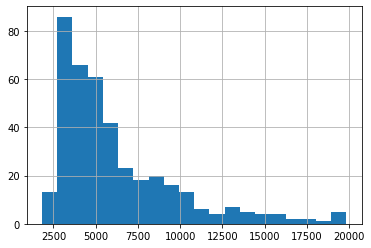

In [9]:
texts_df['len'] = texts_df['text'].str.len()
texts_df[texts_df.len.lt(20_000)]['len'].hist(bins=20)

In [10]:
texts_df.sort_values(by=['len'])

,href,text,len
153,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,1824
164,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,2157
336,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,2255
26,https://e-disclosure.ru/portal/event.aspx?Even...,\n Сообщение о существенном факте\n...,2349
70,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,2380
...,...,...,...
29,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,78187
175,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,79802
282,https://e-disclosure.ru/portal/event.aspx?Even...,\n Сообщение о существенном факте о...,80206
399,https://e-disclosure.ru/portal/event.aspx?Even...,\n Сообщение о существенном факте о...,81804


In [11]:
texts_df[texts_df.text.str.contains("дивиденд")]

,href,text,len
1,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,6269
2,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,8477
3,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,9073
8,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,4382
12,https://e-disclosure.ru/portal/event.aspx?Even...,\n Сообщение о существенном факте\n...,4156
...,...,...,...
417,https://e-disclosure.ru/portal/event.aspx?Even...,\n\nО проведении общего собрания участников (а...,5457
419,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,7013
424,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,7789
427,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,5009


In [15]:
texts_df[texts_df.text.str.contains('дивиденд')]

,href,text,len
1,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,6269
2,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,8477
3,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,9073
8,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,4382
12,https://e-disclosure.ru/portal/event.aspx?Even...,\n Сообщение о существенном факте\n...,4156
...,...,...,...
417,https://e-disclosure.ru/portal/event.aspx?Even...,\n\nО проведении общего собрания участников (а...,5457
419,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,7013
424,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,7789
427,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,5009


In [16]:
texts_df[texts_df.text.str.contains('участников')]

,href,text,len
0,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,19248
1,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,6269
2,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,8477
3,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,9073
4,https://e-disclosure.ru/portal/event.aspx?Even...,"\n Сообщение о существенном факте ""...",8689
...,...,...,...
444,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,4146
445,https://e-disclosure.ru/portal/event.aspx?Even...,\n\nО проведении общего собрания участников (а...,5411
447,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,3876
448,https://e-disclosure.ru/portal/event.aspx?Even...,\n Решения общих собраний участнико...,3002


In [19]:
print(texts_df.iloc[449]['text'])


            Сообщение о существенном факте 
о созыве и проведении общего собрания участников (акционеров) эмитента, а также о решениях, принятых общим собранием участников (акционеров) эмитента
1. Общие сведения
1.1. Полное фирменное наименование эмитента	Общество с ограниченной ответственностью
«Хоум Кредит энд Финанс Банк»
1.2. Сокращенное фирменное наименование эмитента	ООО «ХКФ Банк»
1.3. Место нахождения эмитента	125124, Москва, улица Правды, дом 8, корпус 1
1.4. ОГРН эмитента	1027700280937
1.5. ИНН эмитента	7735057951
1.6. Уникальный код эмитента, присвоенный регистрирующим органом	00316В
1.7. Адрес страницы в сети Интернет, используемой эмитентом для раскрытия информации	www.homecredit.ru, 
www.e-disclosure.ru/portal/company.aspx?id=4644
1.8. Дата наступления события (существенного факта), о котором составлено сообщение (если применимо)	«12» октября 2020 г.
	2. Содержание сообщения
О проведении общего собрания участников эмитента и о принятых им решениях
2.1. Вид общего собрани

In [112]:
texts_df.to_parquet("parsed_data.parquet")

In [113]:
from wordcloud import WordCloud

In [ ]:
WordCloud()